<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo_18/blob/main/Equipo_18_Entrega_1_Aguas_Subterraneas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

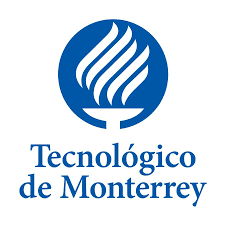

# **TC4029 Ciencia y analítica de datos**

Reto: Entrega 1

Limpieza, análisis, visualización y agrupamiento.

# **Aguas subterraneas**

José Eduardo Esperón Carreón A01372413

Moisés Rangel Silva A00143704

Profesora: Dra. María de la Paz Rico Fernández

Noviembre 11 de 2022

**Indice de la Entrega 1**

*   Limpieza de base de datos.

> Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
*   Identificando tendencias centrales promedio, media y mediana de los datos.
*   Identificar medidas de dispersión, máximo, mínimo
*   Identificar medidas de posición no centrales , los cuartiles , outliers
*   Identificar correlaciones.
*   Preparar los datos


*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import graphviz
import math
import pydotplus
import missingno as msno
import seaborn as sns  
import seaborn as load_dataset
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer

import warnings

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from scipy.stats import boxcox
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier

In [15]:
#Creación del data frame de las aguas subterraneas

Data = "https://github.com/PosgradoMNA/actividades-del-projecto-cad_equipo_18/blob/main/Dataset/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
TCC = pd.read_csv(Data, index_col=0)  #, header = 0, 
#Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.
TCC.rename(columns = {
    'X1':'CLAVE',
    'X2':'SITIO',
    'X3':'ORGANISMO_DE_CUENCA',
    'X4':'ESTADO',
    'X5':'MUNICIPIO',
    'X6':'ACUIFERO',
    'X7':'SUBTIPO',
    'X8':'LONGITUD',
    'X9':'LATITUD',
    'X10':'PERIODO',
    'X11':'ALC_mg/L',
    'X12':'CALIDAD_ALC',
    'X13':'CONDUCT_mS/cm',
    'X14':'CALIDAD_CONDUC',
    'X15':'SDT_mg/L',
    'X16':'SDT_M_mg/L',
    'X17':'CALIDAD_SDT_ra',
    'X18':'CALIDAD_SDT_salin',
    'X19':'FLUORUROS_mg/L',
    'X20':'CALIDAD_FLUO',
    'X21':'DUR_mg/L',
    'X22':'CALIDAD_DUR',
    'X23':'COLI_FEC_NMP/100_mL',
    'X24':'CALIDAD_COLI_FEC',
    'X25':'N_NO3_mg/L',
    'X26':'CALIDAD_N_NO3',
    'X27':'AS_TOT_mg/L',
    'X28':'CALIDAD_AS',
    'X29':'CD_TOT_mg/L',
    'X30':'CALIDAD_CD',
    'X31':'CR_TOT_mg/L',
    'X32':'CALIDAD_CR',
    'X33':'HG_TOT_mg/L',
    'X34':'CALIDAD_HG',
    'X35':'PB_TOT_mg/L',
    'X36':'CALIDAD_PB',
    'X37':'MN_TOT_mg/L',
    'X38':'CALIDAD_MN',
    'X39':'FE_TOT_mg/L',
    'X40':'CALIDAD_FE',
    'X41':'SEMAFORO',
    'X42':'CONTAMINANTES',
    'X43':'CUMPLE_CON_ALC',
    'X44':'CUMPLE_CON_COND',
    'X45':'CUMPLE_CON_SDT_ra',
    'X46':'CUMPLE_CON_SDT_salin',
    'X47':'CUMPLE_CON_FLUO',
    'X48':'CUMPLE_CON_DUR',
    'X49':'CUMPLE_CON_CF',
    'X50':'CUMPLE_CON_NO3',
    'X51':'CUMPLE_CON_AS',
    'X52':'CUMPLE_CON_CD',
    'X53':'CUMPLE_CON_CR',
    'X54':'CUMPLE_CON_HG',
    'X55':'CUMPLE_CON_PB',
    'X56':'CUMPLE_CON_MN',
    'X57':'CUMPLE_CON_FE',
}, inplace = True)
#El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad de crear otro nuevo
TCC.head()


HTTPError: ignored

HTTPError: ignored

In [11]:
len(AGUA_SUB)

NameError: ignored

In [ ]:
AGUA_SUB.dtypes

CLAVE                    int64
SITIO                  float64
ORGANISMO_DE_CUENCA    float64
ESTADO                 float64
MUNICIPIO              float64
ACUIFERO               float64
SUBTIPO                float64
LONGITUD               float64
LATITUD                float64
PERIODO                float64
ALC_mg/L               float64
CALIDAD_ALC            float64
CONDUCT_mS/cm          float64
CALIDAD_CONDUC         float64
SDT_mg/L               float64
SDT_M_mg/L             float64
CALIDAD_SDT_ra         float64
CALIDAD_SDT_salin      float64
FLUORUROS_mg/L         float64
CALIDAD_FLUO           float64
DUR_mg/L               float64
CALIDAD_DUR            float64
COLI_FEC_NMP/100_mL    float64
Y                      float64
dtype: object

In [ ]:
AGUA_SUB.shape

(30000, 24)